In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import itertools

In [3]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount.csv', index_col=0)
df_test = pd.read_csv('datasets/SatisfactionClients/amazon_test1.csv', index_col=0)
df.head(2)

,pays,note,titre,commentaire
0,FR,1,Les As du prélèvement illicite,"Il y a un jourLes As du prélèvement illicitePratiques à la limite de légal.J' ai pris un paiement en 4x dont il restait deux mois , pendant 1 semaine je ne retrouve pas ma carte , je la bloque temporairement.Le prelevement 3 ne passe pas Cdiscount m' informe qu' il faut régulariser, je retrouve ma carte et........boum deux prelevements simultanés des deux mensualités, celle du et l' autre prévue pour décembre.Cela me servira de leçon mais les vautours c 'est fini pour moi.Date de l'expérience: 14 novembre 2022"
1,FR,1,Commande une télévision avec rendez…,Il y a 13 heuresCommande une télévision avec rendez…Commande une télévision avec rendez vous du livreur. Je prend une journée de congé et le livreur ne vient pas. Je demande le renvoie de la télé chez Cdiscount. Cdiscount me rembourse la télé mes pas les 29 euros de livraison. Donc une journée de congé pour rien et un cadeau de 29 euros a Cdiscount. Plus jamais de commande sur Cdiscount.Date de l'expérience: 02 novembre 2022


In [5]:
# chargement de la bibliothèque de stopwords et de tokenisation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.tokenize import PunktSentenceTokenizer

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t.fourtouill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# chargement des listes stopwords pour les 3 langues principales 
stop_words_french = stopwords.words('french')
stop_words_english = stopwords.words('english')
stop_words_spanish = stopwords.words('spanish')

# création d'une stopwords regroupant les 3 langues
stop_words = stop_words_french + stop_words_english + stop_words_spanish

In [8]:
def commentaire_filtering(txt, stop_words):
    tokenizer = RegexpTokenizer('[a-zA-Zéèëãñ]')
    tokens = word_tokenize(txt.lower())
    words = [word for word in tokens if word not in stop_words]
    return ' '.join(words).strip()

In [9]:
# création d'une colonne commentaire_filtre par application de la fonction commentaire_filtering à la colonne commentaire
t0 = time()

df['commentaire_filtre'] = df['commentaire'].apply(lambda x : commentaire_filtering(str(x), stop_words))

print('le temps de calcul est de {:.2f}'.format(time()-t0), ' secondes')

le temps de calcul est de 110.94  secondes


In [10]:
df.head(2)

,pays,note,titre,commentaire,commentaire_filtre
0,FR,1,Les As du prélèvement illicite,"Il y a un jourLes As du prélèvement illicitePratiques à la limite de légal.J' ai pris un paiement en 4x dont il restait deux mois , pendant 1 semaine je ne retrouve pas ma carte , je la bloque temporairement.Le prelevement 3 ne passe pas Cdiscount m' informe qu' il faut régulariser, je retrouve ma carte et........boum deux prelevements simultanés des deux mensualités, celle du et l' autre prévue pour décembre.Cela me servira de leçon mais les vautours c 'est fini pour moi.Date de l'expérience: 14 novembre 2022","jourles prélèvement illicitepratiques limite légal.j ' pris paiement 4x dont restait deux mois , pendant 1 semaine retrouve carte , bloque temporairement.le prelevement 3 passe cdiscount ' informe ' faut régulariser , retrouve carte ........ boum deux prelevements simultanés deux mensualités , celle ' autre prévue décembre.cela servira leçon vautours 'est fini moi.date l'expérience : 14 novembre 2022"
1,FR,1,Commande une télévision avec rendez…,Il y a 13 heuresCommande une télévision avec rendez…Commande une télévision avec rendez vous du livreur. Je prend une journée de congé et le livreur ne vient pas. Je demande le renvoie de la télé chez Cdiscount. Cdiscount me rembourse la télé mes pas les 29 euros de livraison. Donc une journée de congé pour rien et un cadeau de 29 euros a Cdiscount. Plus jamais de commande sur Cdiscount.Date de l'expérience: 02 novembre 2022,13 heurescommande télévision rendez…commande télévision rendez livreur . prend journée congé livreur vient . demande renvoie télé chez cdiscount . cdiscount rembourse télé 29 euros livraison . donc journée congé rien cadeau 29 euros cdiscount . plus jamais commande cdiscount.date l'expérience : 02 novembre 2022


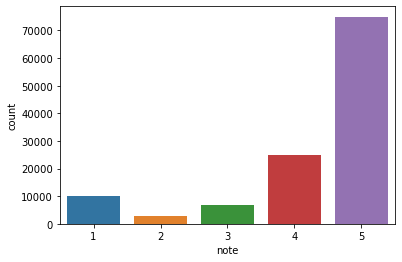

In [11]:
sns.countplot(x='note', data=df);

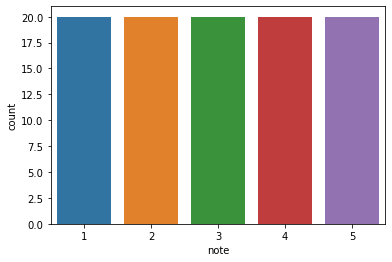

In [12]:
sns.countplot(x='note', data=df_test);

In [13]:
# séparation de la variable cible et des variables explicatives
X = df['commentaire_filtre']
y = df['note'].values

In [14]:
# séparation du jeu de données en un dataset d'entrainement et un dataset de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(df_test.shape)

(96000,)
(24000,)
(100, 4)


In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [17]:
# tokenisation des commentaires
num_words=2000
tk = Tokenizer(num_words=num_words, lower=True)

In [18]:
# entrainement de la tokenisation sur le X_train
tk.fit_on_texts(X_train)

In [19]:
# nb de ligne de la matrice
word_index = tk.word_index
len(tk.word_index)

80163

In [20]:
# nb de colonnes dans la matrice
vocabulary_size = tk.num_words
vocabulary_size

2000

In [21]:
# mise sous vecteur des commentaires
X_seq_train = tk.texts_to_sequences(X_train)
X_seq_test = tk.texts_to_sequences(X_test)

In [22]:
# affichage de la vectorisation réalisée
for x in range(0,5):
    print(X_seq_train[x]) 

[79, 42, 5, 133, 203, 1, 105, 40, 4]
[48, 8, 1202, 20, 209, 1, 48, 8, 6]
[69, 17, 1735, 366, 1, 69, 16, 24]
[83, 22, 26, 254, 1, 104, 22, 18]
[71, 17, 878, 404, 397, 77, 404, 397, 77, 14, 777, 211, 204, 220, 111, 154, 211, 158, 1058, 2, 1, 71, 16, 24]


Text(0.5, 1.0, 'commentaires sans stop_word')

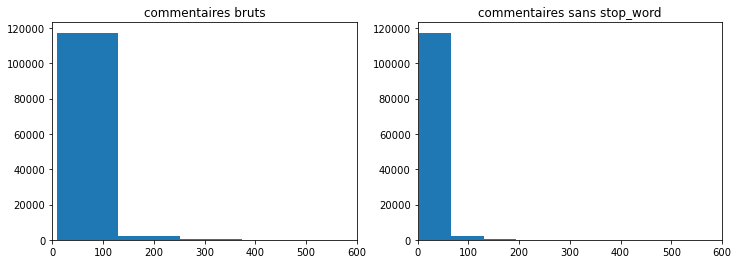

In [23]:
# affichage du nb de mots par commentaire pour nous aider à choisir le nb de mots dans la matrice 
df_hist = pd.read_csv('datasets/SatisfactionClients/cdiscount_retraite.csv', index_col=0)
df_hist['split'] = df_hist['commentaire'].apply(lambda x: len(x.split(' ')))
df_hist['filtre_split'] = df_hist['Commentaire_filtre'].apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(df_hist['split'])
plt.xlim([0, 600])
plt.title('commentaires bruts')
plt.subplot(122)
plt.hist(df_hist['filtre_split'])
plt.xlim([0, 600])
plt.title('commentaires sans stop_word')

In [24]:
# transformation en matrice de même longueur par maxlen défini ci-dessous. Avec des 0 si colonne inférieure à maxlen
max_words = 200
X_pad_train = pad_sequences(X_seq_train, maxlen=max_words, padding='post')
X_pad_test= pad_sequences(X_seq_test, maxlen=max_words, padding='post')

In [25]:
# affice de la matrice
print(X_pad_train.shape)
X_pad_train

(96000, 200)


array([[  79,   42,    5, ...,    0,    0,    0],
       [  48,    8, 1202, ...,    0,    0,    0],
       [  69,   17, 1735, ...,    0,    0,    0],
       ...,
       [  49,   33,   23, ...,    0,    0,    0],
       [  48,   21,   23, ...,    0,    0,    0],
       [  68,   42,  474, ...,    0,    0,    0]])

In [26]:
# Création des couches du modéle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, Embedding, Dropout

embedding_size = 100

model_embedding_1 = Sequential()
model_embedding_1.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_size, input_length=max_words, embeddings_initializer='uniform'))  # On reprend le nb de mot choisi dans la tokenisation
model_embedding_1.add(GlobalAveragePooling1D())
model_embedding_1.add(Dense(units=256, activation='relu'))
model_embedding_1.add(Dropout(rate=0.3))
model_embedding_1.add(Dense(units=6, activation='softmax')) # En sortie le nb de units devra correspondre aux nb de variables cibles

model_embedding_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          200000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 227,398
Trainable params: 227,398
Non-trainable params: 0
_________________________________________________________________


In [27]:
# timer pour mesurer le temps écoulé entre les epochs de début et de fin de callback
from tensorflow.keras.callbacks import Callback
from timeit import default_timer as timer

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

# instanciation la fonction TimingCallback()
time_callback = TimingCallback()

In [28]:
# Création des callback
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                          min_delta=0.01,
                          patience=2,
                          mode='min',
                          restore_best_weights=True,
                          verbose=1)

In [29]:
model_embedding_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
batch_size = 32
history = model_embedding_1.fit(X_pad_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,
                               callbacks=[early_stop, time_callback])

NameError: name 'epochs' is not defined

In [ ]:
model_embedding_1.evaluate(X_pad_test, y_test, verbose=1)

### Calcul des prédictions sur le le de test cdiscount

In [ ]:
# création des prédictions du eu de test cdiscount à partir du modèle
predict_cdiscount = model_embedding_1.predict(X_pad_test, verbose=1)

In [ ]:
predict_cdiscount_class = predict_cdiscount.argmax(axis=1)
predict_cdiscount_class

In [ ]:
sns.countplot(predict_cdiscount_class)
plt.show();

### Calcul des prédictions sur le jeu de test amazon

In [ ]:
# création d'une colonne commentaire_filtre par application de la fonction commentaire_filtering à la colonne commentaire
t0 = time()

df_test['commentaire_filtre'] = df_test['commentaire'].apply(lambda x : commentaire_filtering(str(x), stop_words))

print('le temps de calcul est de {:.2f}'.format(time()-t0))

In [ ]:
df_test.head(2)

In [ ]:
# séparation de la variable cible et des variables explicatives
check_set = df_test['commentaire_filtre'].values

In [ ]:
# vectorisation des token
check_seq = tk.texts_to_sequences(check_set)

In [ ]:
# mise sous matrice numpy
check_pad = pad_sequences(check_seq, maxlen=max_words, padding='post')

In [ ]:
check_pad

In [ ]:
# création des prédictions du jeu de test amazon à partir du modèle
check_predict = model_embedding_1.predict(check_pad, verbose=1)

In [ ]:
print(check_predict)

In [ ]:
check_predict_class = check_predict.argmax(axis=1)
check_predict_class

In [ ]:
sns.countplot(check_predict_class);

In [ ]:
# comparaison des prédictions et des notes du jeu de test
check_df = pd.DataFrame(list(zip(df_test.commentaire, df_test.note, check_predict_class)), columns=['commentaire', 'note', 'prediction'])
check_df.head()

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, predict_cdiscount_class)
print(cr)

cm = pd.crosstab(y_test, predict_cdiscount_class, rownames=['données réelles'], colnames=['predictions'])
display(cm)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)

cm_test = classification_report(df_test.note, check_predict_class)
print(cm_test)

cm_test2 = pd.crosstab(df_test.note, check_predict_class, rownames=['données réelles'], colnames=['predictions'])
display(cm_test2)

cm_test3 = pd.crosstab(df_test.note, check_predict_class, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test3)

for i in cm_test3.index:
    for j in cm_test3.columns :
        if (i==j and cm_test3.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {:0.0%}".format(i, cm_test3.loc[i, j]))

In [ ]:
import os
path = "/Users/t.fourtouill/Downloads/SatisfactionClients"
os.makedirs(path, exist_ok=True)
model_embedding_1.save('datasets/SatisfactionClients/model_embedding1')